# Inferential statistics II - Bootstrapping

## Introduction

In the previous frequentist mini-projects, you did frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th-Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold for the particular case you're working on, and what you want to do has a known theoretical distribution (for example the mean of a sampling distribution that we looked at in the previous mini-project.)

In this mini-project, you'll use the same medical charge data you used in the frequentist inference mini-project, but this time you'll make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment.) If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [3]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [4]:
med_charges = pd.read_csv('data/insurance2.csv')

In [5]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [6]:
def get_num_bins(vals):
    bins = 0
    maxv = max(vals)
    minv = min(vals)
    vals_q75, vals_q25 = np.percentile(vals, [75,25])    
    iqr = vals_q75 - vals_q25
    h = 2 * iqr / len(vals) ** (1/3)
    bins = (maxv - minv) / h
    return int(bins)

In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q1:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [7]:
np.random.seed(47)
N_rep = 10000

In [8]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(a=data, size=len(data), replace=True)
    return func(bs_sample)


In [9]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [10]:
bs_reps_costs = draw_bs_reps(data=med_charges.charges, func=np.mean, size=N_rep)
bs_reps_costs

array([13386.79887534, 13227.45279065, 13445.33945215, ...,
       13471.93323532, 13362.85633056, 13217.44777868])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


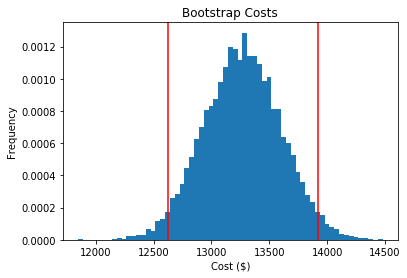

In [11]:
_ = plt.hist(bs_reps_costs, bins=get_num_bins(bs_reps_costs), normed=True)
_ = plt.axvline(np.percentile(a=bs_reps_costs, q=2.5), color='r')
_ = plt.axvline(np.percentile(a=bs_reps_costs, q=97.5), color='r')

plt.title('Bootstrap Costs')
plt.xlabel('Cost ($)')
plt.ylabel('Frequency')

plt.show()


In [12]:
np.mean(bs_reps_costs)

13268.292567069491

In [49]:
# the hospital administrator only cares about if hte mean charge is less than $1200 so
# therefore we do a 1 sided CI test.

In [13]:
np.percentile(a=bs_reps_costs, q=[2.5, 50, 97.5])

array([12624.86211913, 13270.11970711, 13918.00929997])

In [48]:
# here we do a 1 sided interval because we only care about if the mean charge is less than 12,000
# and not if it's "different than 12000"
np.percentile(a=bs_reps_costs, q=[5])

array([12724.4679217])

If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q2:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). 

Calculate the differences over 10000 replicates. 

Plot the histogram of values and mark the locations of the percentiles. 

State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

# Steps

# 1) Hypothesis

We want to see if these 2 groups have the same mean charge (?) but not necesarily the same distribution

> HO - null hypothesis

There is *no* difference in standard deviations between the insurance vs no insurance claims

> HA - alt hypothesis

There is a difference in standard deviations between the insurance vs no insurance claims

In [17]:
insurance = med_charges[med_charges.insuranceclaim == 1]
insurance

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.92400,1
1,18,1,33.77,1,0,2,1725.55230,1
4,32,1,28.88,0,0,1,3866.85520,1
6,46,0,33.44,1,0,2,8240.58960,1
10,25,1,26.22,0,0,0,2721.32080,1
...,...,...,...,...,...,...,...,...
1330,57,0,25.74,2,0,2,12629.16560,1
1331,23,0,33.40,0,0,3,10795.93733,1
1334,18,0,31.92,0,0,0,2205.98080,1
1335,18,0,36.85,0,0,2,1629.83350,1


In [18]:
no_insurance = med_charges[med_charges.insuranceclaim == 0]
no_insurance

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
...,...,...,...,...,...,...,...,...
1324,31,1,25.935,1,0,1,4239.89265,0
1328,23,0,24.225,2,0,0,22395.74424,0
1332,52,0,44.700,3,0,3,11411.68500,0
1333,50,1,30.970,3,0,1,10600.54830,0


# 2) Test Statistic

the std dev from the observed data (entire data set, not split between insurance vs no insurance).

In [19]:
# we need a function called "diff of std dev"

def diff_of_stddev(data1, data2):
    """The difference in std dev of two arrays"""
    
    diff = np.std(data1) - np.std(data2)
    return diff

In [20]:
empirical_diff_stddev = diff_of_stddev(insurance.charges, no_insurance.charges)
empirical_diff_stddev

7596.256408655178

# 3) p-value

In [21]:
np.random.seed(47)

In [22]:
bs_replicates_insurance = draw_bs_reps(data=insurance.charges, func=np.std, size=N_rep)

In [23]:
bs_replicates_no_insurance = draw_bs_reps(data=no_insurance.charges, func=np.std, size=N_rep)

In [29]:
bs_replicates_stddev = bs_replicates_insurance - bs_replicates_no_insurance

In [51]:
len(bs_replicates_stddev)

10000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


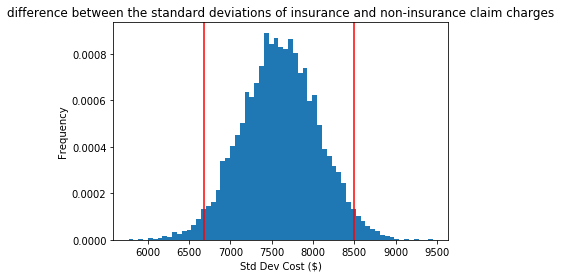

In [42]:
_ = plt.hist(bs_replicates_stddev, bins=get_num_bins(bs_replicates_stddev), normed=True)
_ = plt.axvline(np.percentile(a=bs_replicates_stddev, q=2.5), color='r')
_ = plt.axvline(np.percentile(a=bs_replicates_stddev, q=97.5), color='r')

plt.title('difference between the standard deviations of insurance and non-insurance claim charges')
plt.xlabel('Std Dev Cost ($)')
plt.ylabel('Frequency')

plt.show()

# Answer

Therefore the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured) over 10,000 replicates is:

In [26]:
print(np.percentile(a=bs_replicates_stddev, q=2.5), np.percentile(a=bs_replicates_stddev, q=97.5))

6684.314477659681 8500.749022629885


The p-value is quite high (0.499) so we can accept the null hypothesis

In [52]:
empirical_diff_stddev

7596.256408655178

In [32]:
# Compute and print p-value: p
p = np.sum(bs_replicates_stddev >= empirical_diff_stddev) / len(bs_replicates_stddev)
print('p-value =', p)

p-value = 0.4999


## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q3:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

# Steps

# 1) Hypothesis

We want to see observed difference between insurance and non-insurance charges (using the means)
for the observed difference between the means of insured and non-insured medical cases. 

> HO - null hypothesis

There is *no* difference in the means between the insurance vs no insurance claims

> HA - alt hypothesis

There is a difference in the means between the insurance vs no insurance claims

# 2) Test Statistic

In [33]:
# we need a function called "diff of means"

def diff_of_means(data1, data2):
    """The difference in std dev of two arrays"""
    
    diff = np.mean(data1) - np.mean(data2)
    return diff

In [34]:
empirical_diff_mean = diff_of_means(insurance.charges, no_insurance.charges)
empirical_diff_mean

7602.506384231368

# 3) 95% CI and p-value

In [ ]:
# Here we need to shift the observed data so that both data sets have the same mean.
# we do this because our null hypothesis assumes that there is no difference between them, 
# hence they have the same mean.

In [54]:
mean_cost = np.mean(med_charges.charges)
mean_cost 

13270.422265141257

In [59]:
# Generate shifted arrays
insurance_shifted = insurance.charges - np.mean(insurance.charges) + mean_cost
insurance_shifted

0       13731.417989
1       -1427.953711
4         713.349189
6        5087.083589
10       -432.185211
            ...     
1330     9475.659589
1331     7642.431319
1334     -947.525211
1335    -1523.672511
1337    25987.854289
Name: charges, Length: 783, dtype: float64

In [61]:
no_insurance_shifted = no_insurance.charges - np.mean(no_insurance.charges) + mean_cost
no_insurance_shifted

2        8898.462373
3       26433.470983
5        8205.621973
7       11730.505973
8       10855.411073
            ...     
1324     8688.893023
1328    26844.744613
1332    15860.685373
1333    15049.548673
1336     6456.945373
Name: charges, Length: 555, dtype: float64

In [ ]:
#draw replicates from the shifted arrays

In [62]:
bs_replicates_insurance_mean = draw_bs_reps(data=insurance_shifted, func=np.mean, size=N_rep)

In [63]:
bs_replicates_no_insurance_mean = draw_bs_reps(data=no_insurance_shifted, func=np.mean, size=N_rep)

In [64]:
bs_replicates_mean = bs_replicates_insurance_mean - bs_replicates_no_insurance_mean

In [65]:
# Compute and print p-value: p
# p = np.sum(np.abs(bs_replicates_mean) > empirical_diff_mean) / len(bs_replicates_mean)

p = np.sum(np.abs(bs_replicates_mean) > empirical_diff_mean) / len(bs_replicates_mean)

print('p-value =', p)

# np.sum(np.abs(bs_reps) > observed_diff) / len(bs_reps)

p-value = 0.0


In [66]:
print(np.percentile(a=bs_replicates_mean, q=2.5), np.percentile(a=bs_replicates_mean, q=97.5))

-1092.616117648249 1120.2732530265848


__Q4:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


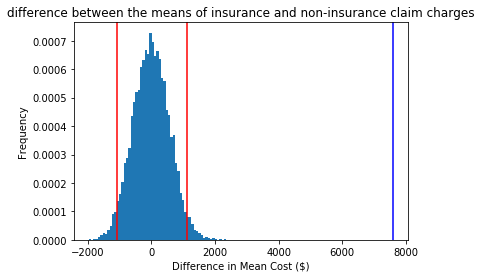

In [68]:
_ = plt.hist(bs_replicates_mean, bins=get_num_bins(bs_replicates_mean), normed=True)

_ = plt.axvline(np.percentile(a=bs_replicates_mean, q=2.5), color='r')
_ = plt.axvline(np.percentile(a=bs_replicates_mean, q=97.5), color='r')

_ = plt.axvline(empirical_diff_mean, color='b')

plt.title('difference between the means of insurance and non-insurance claim charges')
plt.xlabel('Difference in Mean Cost ($)')
plt.ylabel('Frequency')

plt.show()

__A:__

__Q5:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__

p value from before is 0.05.

p value now is 0.0

__Q6:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__

pick the t-test that gives the closes answer to the computed python answer.

so we are trying to pick between:
- manual method (cohen t test) or; 
- scipy.stats library (scipy.stats.ttest_ind)



I would use the scipy.stats.ttest_ind method as it gives a closer p value


__Q7:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? 

What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__

# 1) Hypothesis

> HO - null hypothesis

There is *no* difference in clickthru rate between A and B algo's

> HA - alt hypothesis

There is a difference in clickthru rate between A and B algo's

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.